<a href="https://colab.research.google.com/github/MatthewYu06/CACoding/blob/master/A3/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Part 1: Approximating Pi

A.

In [ ]:
# check if given point is in circle with radius 0.5 centred at (0.5, 0.5)
def in_circle(x, y):
  distance_from_center = ((x - 0.5)**2 + (y - 0.5)**2) ** 0.5
  if (distance_from_center <= 0.5):
    return True
  else:
    return False

In [ ]:
np.random.seed(1)
dots = 100000
dots_in = 0

for i in range(dots):
  x = np.random.uniform(0, 1)
  y = np.random.uniform(0, 1)
  if in_circle(x,y):
    dots_in += 1

pi_estimate = 4 * (dots_in / dots)
print("Estimate for pi: " + str(pi_estimate))

Estimate for pi: 3.14164


## Part 2: Understanding Bias

A.

In [ ]:
# return mean of sample
def get_sample_mean(sample):
  return sum(sample) / sample.size

In [ ]:
# return sample variance of sample
def compute_sample_var(sample):
  sum_differences = 0
  sample_mean = get_sample_mean(sample)
  for i in range(sample.size):
    sum_differences += (sample[i] - sample_mean) ** 2

  return sum_differences / (sample.size-1)

In [ ]:
# return the other estimator for variance provided in the instructions
def compute_other_var(sample):
  sum_differences = 0
  sample_mean = get_sample_mean(sample)
  for i in range(sample.size):
    sum_differences += (sample[i] - sample_mean) ** 2

  return sum_differences / (sample.size)

In [ ]:
# running actual specialist
np.random.seed(9)
sum_bias_sample_var_est = 0
sum_bias_other_est = 0
bias_sample_var_est = {10:0, 25:0, 50:0, 100:0, 250:0, 500:0}
bias_other_est = {10:0, 25:0, 50:0, 100:0, 250:0, 500:0}

for size in bias_sample_var_est:
  sum_bias_sample_var_est = 0
  sum_bias_other_est = 0
  for i in range(1000):

    # sample from specified normal distribution(mean 2, variance 4)
    sample = np.random.normal(loc = 2, scale = 2, size = size)

    # directly add to bias totals by getting difference between estimator and variance parameter
    sum_bias_sample_var_est += (compute_sample_var(sample) - 4)
    sum_bias_other_est += (compute_other_var(sample) - 4)

  # get average bias
  bias_sample_var_est[size] = (sum_bias_sample_var_est / 1000)
  bias_other_est[size] = (sum_bias_other_est / 1000)


B.

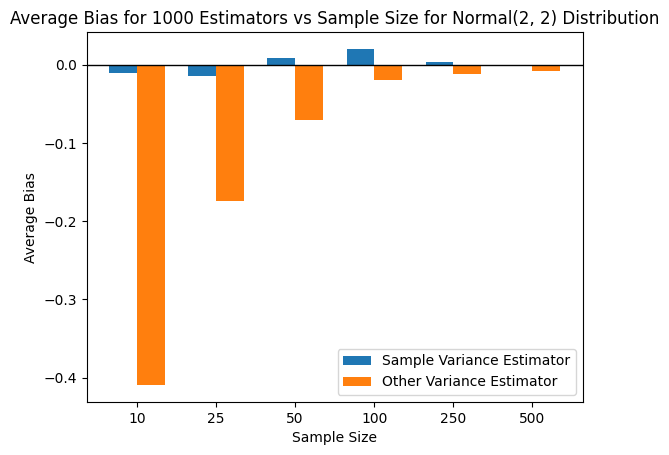

In [ ]:
# Sample sizes
categories = [str(key) for key in bias_sample_var_est.keys()]

# Width of each bar
bar_width = 0.35

# Positions of bars on x-axis
x = np.arange(len(categories))

# Dual bar graph
plt.bar(x - bar_width/2, list(bias_sample_var_est.values()), bar_width, label='Sample Variance Estimator')
plt.bar(x + bar_width/2, list(bias_other_est.values()), bar_width, label='Other Variance Estimator')

# x axis at y = 0.0
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

# labels and legend
plt.xlabel('Sample Size')
plt.ylabel('Average Bias')
plt.title('Average Bias for 1000 Estimators vs Sample Size for Normal(2, 2) Distribution')
plt.xticks(x, categories)
plt.legend()

plt.show()

## Part 4: Asymptotic Behaviour

A.

In [ ]:
np.random.seed(0)
emp_mean = {10: 0, 25: 0, 50: 0, 100: 0, 250: 0, 500: 0, 2000: 0, 5000: 0}

for size in emp_mean.keys():
  samples = np.random.exponential(2, size)  # for expected value of 2, parameter must be 2
  emp_mean[size] = (samples.sum() / size)

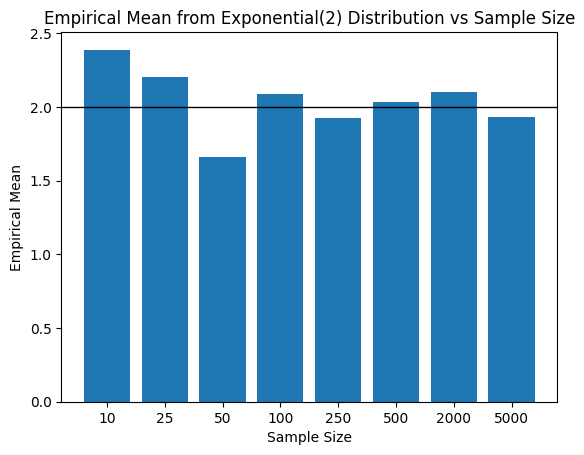

In [ ]:
# Sample sizes
categories = [str(key) for key in emp_mean.keys()]

# Positions of bars on x-axis
x = np.arange(len(categories))

# bar graph
plt.bar(categories, emp_mean.values())

# x axis at y = 2.0
plt.axhline(y=2, color='black', linestyle='-', linewidth=1)

# labels and legend
plt.xlabel('Sample Size')
plt.ylabel('Empirical Mean')
plt.title('Empirical Mean from Exponential(2) Distribution vs Sample Size')

plt.show()

B.

In [ ]:
np.random.seed(1)
emp_mean_distr = {10: [], 25: [], 50: [], 100: [], 250: [], 500: [], 2000: [], 5000: []}

for size in emp_mean_distr.keys():
  for i in range(1000):
    samples = np.random.standard_cauchy(size = size)
    emp_mean = (samples.sum() / size)
    emp_mean_distr[size].append(emp_mean)
  emp_mean_distr[size] = pd.Series(emp_mean_distr[size])


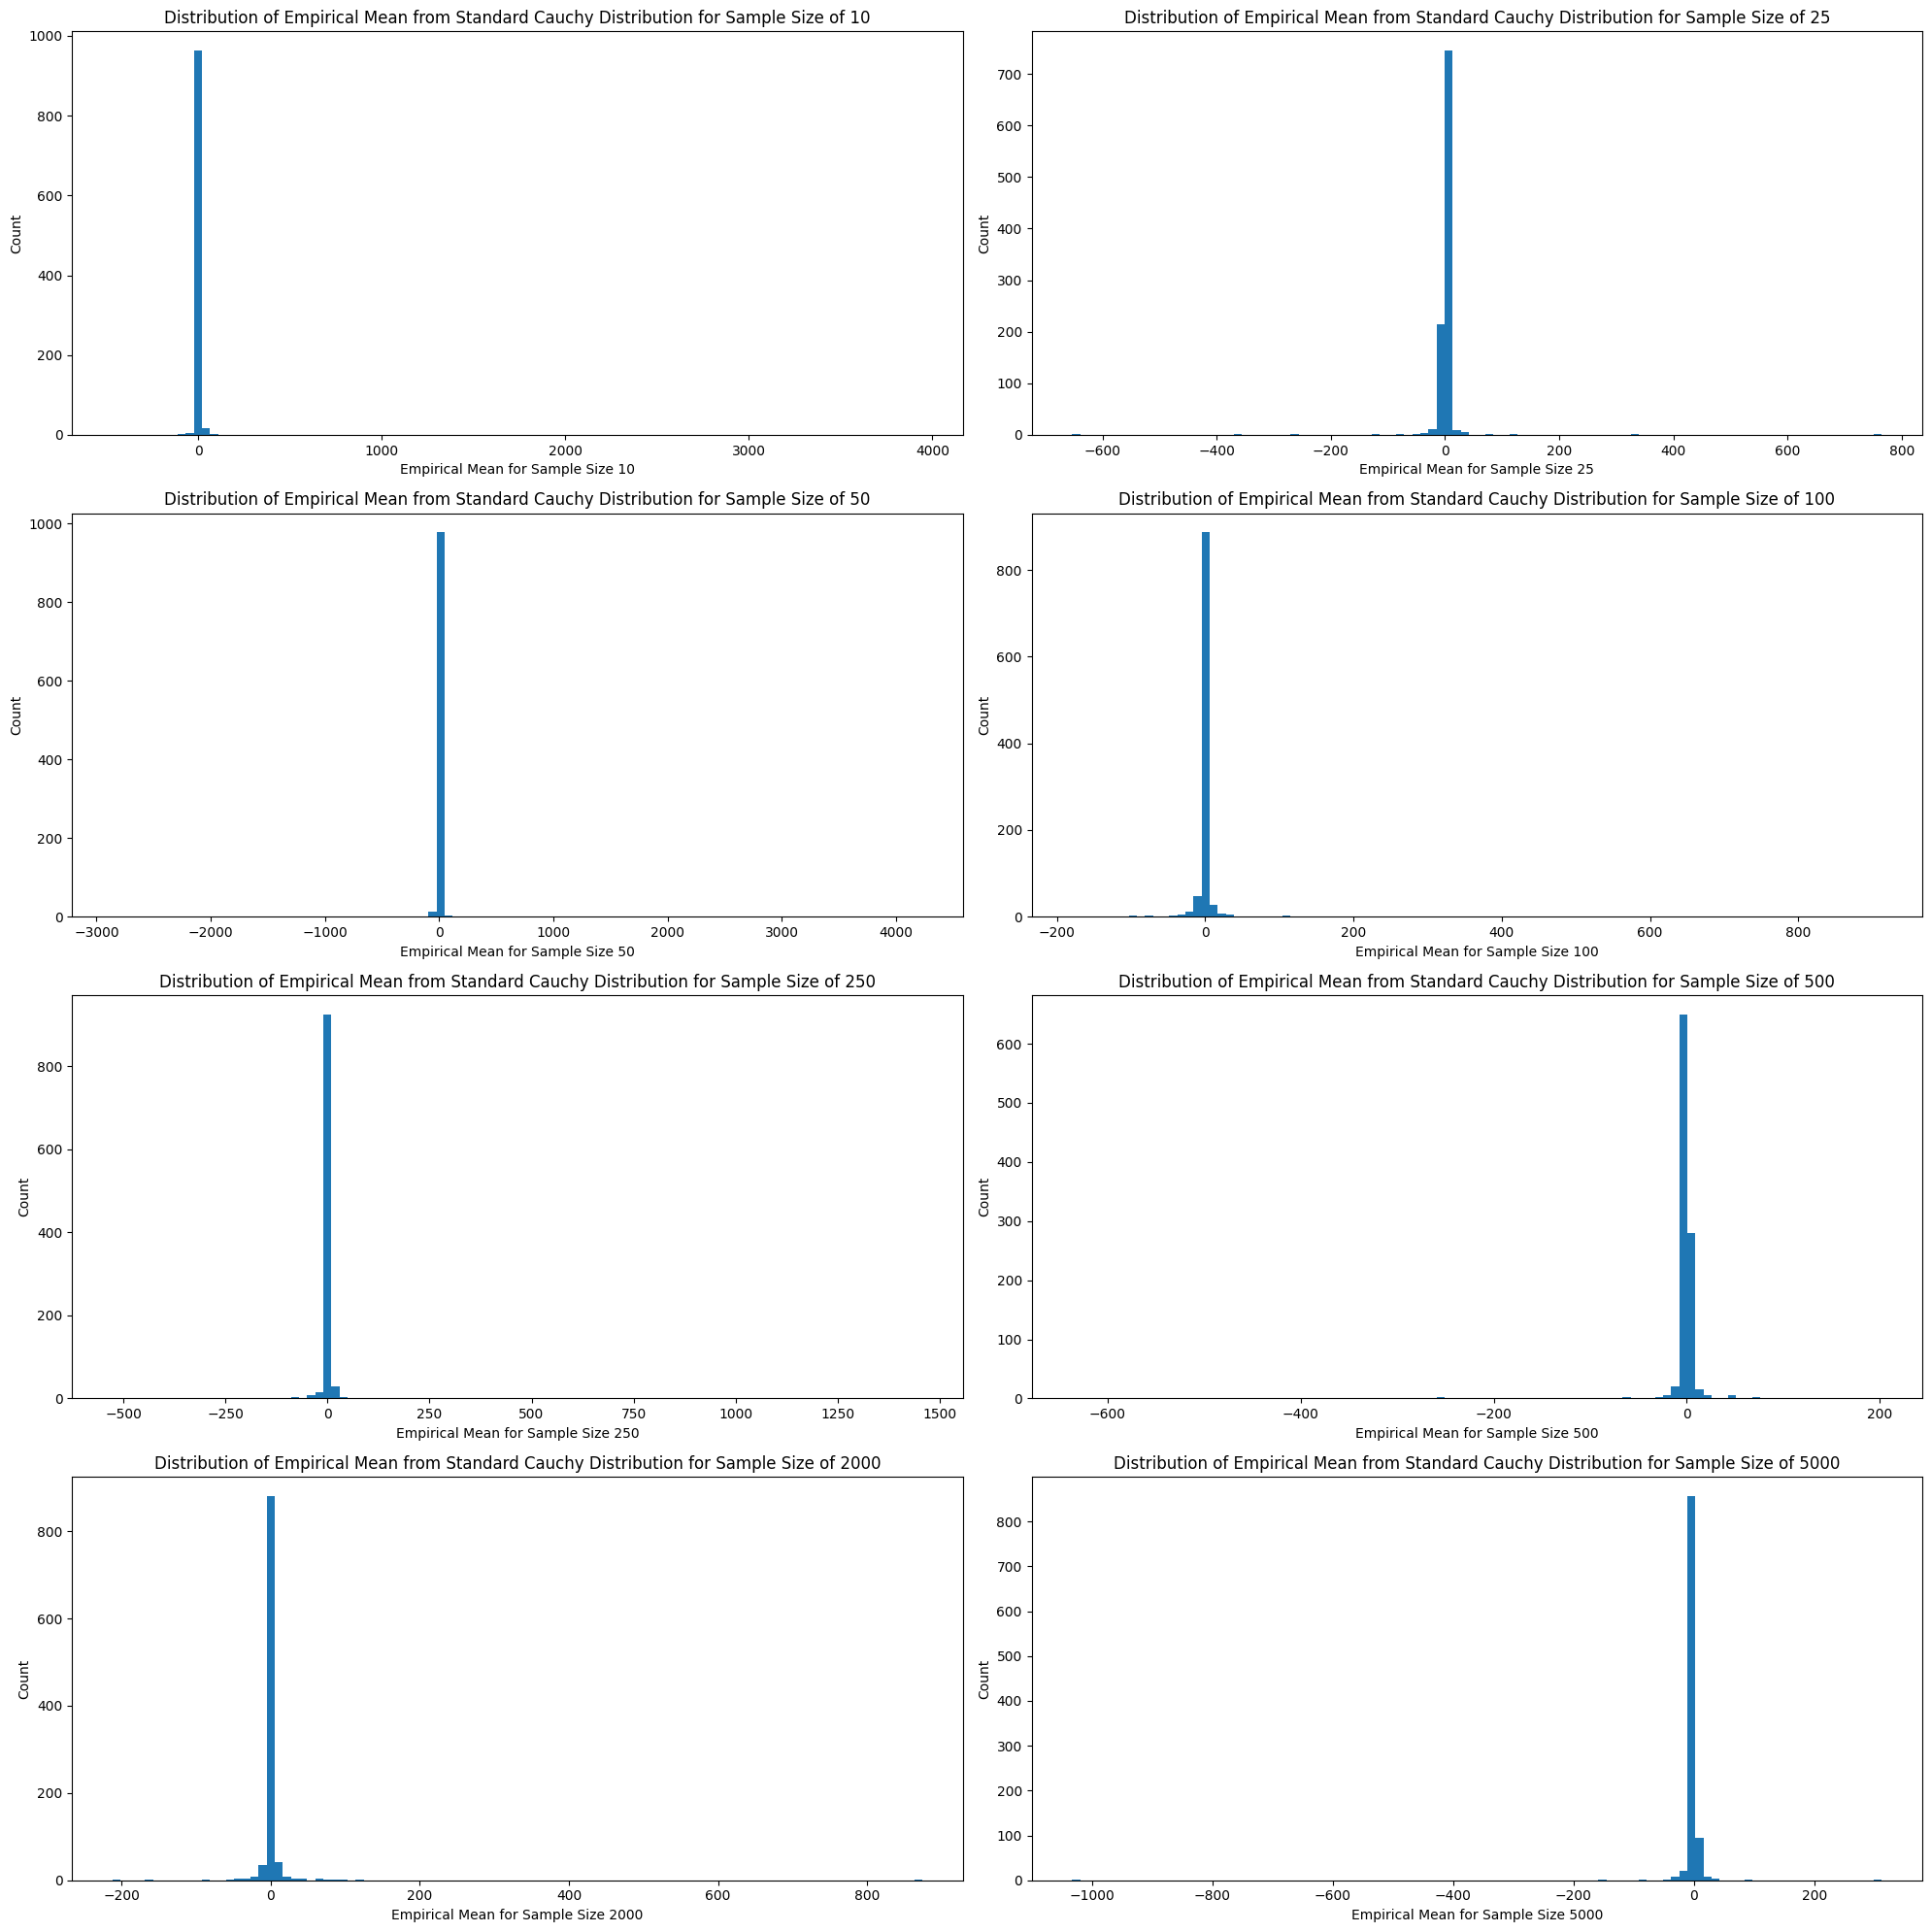

In [ ]:
i = 0
fig, axs = plt.subplots(4, 2, figsize=(20, 20)) # format 8 histograms better
axs = axs.flatten()

for size in emp_mean_distr.keys():
  axs[i].hist(emp_mean_distr[size], bins  = 100)  # use many bins to see distribution better
  axs[i].set_xlabel('Empirical Mean for Sample Size ' + str(size))
  axs[i].set_ylabel('Count')
  axs[i].set_title('Distribution of Empirical Mean from Standard Cauchy Distribution for Sample Size of ' + str(size))
  i += 1

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()
